In this assignment you will work on the autoencoder. Always show how you arrived at your answer. Hand in your assignment by adding the solutions to this notebook file.

<H3>Exercise 1 (7 points)</H3>

We reuse the code you implemented in the MLP assignment. We will use the code to train an autoencoder and reconstruct face images taken from the Yale face database (http://vismod.media.mit.edu/vismod/classes/mas622-00/datasets). For illustration we test reconstruction performance on the training set.

In [4]:
import numpy as np
import scipy.stats as ss

def sigmoid(x):
    """
    Sigmoid function; returns function value and gradient
    """

    fx = 1.0 / (1 + np.exp(-x))
    gradx = fx * (1 - fx)

    return fx, gradx

def error(f_a_3,T):
    """
    Computes squared error divided by number of trials
    
    Input:
    f_a_3 : MLP output states
    T   : noutput x ntrials targets

    Output:
    E_w        : squared error
    
    """
   
    ntrials = T.shape[1]

    E_w = 1.0 / (2 * ntrials) * np.sum(np.sum((f_a_3 - T) ** 2))
   
    return E_w

def forwardprop(W_1, W_2, X):
    """
    Performs forward propagation
    
    Input:
    W_1 : nhidden x ninput input-to-hidden weight matrix
    W_2 : noutput x nhidden hidden-to-output weight matrix
    X   : ninput x ntrials input data
    
    Output:
    f_a_2 : MLP hidden unit states
    f_a_3 : MLP output states
    grad_f_a_2 : gradient of the hidden unit activation function
    grad_f_a_3 : gradient of the output unit activation function
    """
    
    # You should now implement the forward propagation function. Your
    # implementation should compute and return the outputs of the second and
    # third layer units as well as their gradients.

    # First, compute the inputs of the second layer units (i.e. a_2). Write
    # your code below:
    # -------------------------------------------------------------------------
    a_2 = np.dot(W_1, X)
    # -------------------------------------------------------------------------

    # Once you have computed a_2, use it with the sigmoid function that you
    # have implemented (i.e. sigmoid) to compute the outputs of the second
    # layer units (i.e. f_a_2) and their gradients (i.e. grad_f_a_2). Write
    # your code below:
    # -------------------------------------------------------------------------
    f_a_2, grad_f_a_2 = sigmoid(a_2) 
    # -------------------------------------------------------------------------

    # Then, compute the inputs of the third layer units (i.e. a_3). Write your
    # code below:
    # -------------------------------------------------------------------------

    a_3 = np.dot(W_2, f_a_2)
    
    # -------------------------------------------------------------------------

    # Once you have computed a_3, use it with the sigmoid function that you
    # have implemented (i.e. sigmoid) to compute the outputs of the third layer
    # units (i.e. f_a_3) and their gradients (i.e. grad_f_a_3). Write your code
    # below:
    # -------------------------------------------------------------------------

    f_a_3, grad_f_a_3 = sigmoid(a_3)
    # -------------------------------------------------------------------------

    return f_a_2, f_a_3, grad_f_a_2, grad_f_a_3


def backprop(f_a_2, f_a_3, grad_f_a_2, grad_f_a_3, T, W_2, X):
    """
    Performs backpropagation step
    
    Input:
    f_a_2 : MLP hidden unit states
    f_a_3 : MLP output states
    grad_f_a_2 : gradient of the hidden unit activation function
    grad_f_a_3 : gradient of the output unit activation function
    T   : noutput x ntrials targets
    W_2 : noutput x nhidden hidden-to-output weight matrix
    X   : ninput x ntrials input data
    
    Output:
    grad_E_w_1 : ntrials x 1 gradient of the error w.r.t W_1
    grad_E_w_2 : ntrials x 1 gradient of the error w.r.t W_2
    """
        
    # You should now implement the back propagation function. Your
    # implementation should compute and return the gradients of the error
    # function.

    # First, compute the errors of the second and third layer units (i.e.
    # delta_2 and delta_3). Write you code below:
    # -------------------------------------------------------------------------
    

    delta_3 = (f_a_3 - T) * grad_f_a_3
                   
    delta_2 = grad_f_a_2 *(np.dot(W_2.T, delta_3))
    
    # -------------------------------------------------------------------------

    # Once you have computed delta_2 and delta_3, use them to compute the
    # gradients of the error function (i.e. grad_E_w_1 and grad_E_w_2). Write
    # your code below:
    # -------------------------------------------------------------------------
 
    # Add your solution here.
    grad_E_w_2 = np.dot(delta_3, f_a_2.T)
    
    grad_E_w_1 = np.dot(delta_2, X.T)
    # -------------------------------------------------------------------------
    
    return grad_E_w_1, grad_E_w_2

First we construct a dataset from the face database.

In [5]:
import os
from PIL import Image
import scipy.stats as stat

n = len(os.listdir("yalefaces"))

maxsz = [32, 32]

X = []
i=0
for file in os.listdir("yalefaces"):
    im = Image.open(os.getcwd() + '/yalefaces/' + file)
    im.thumbnail(maxsz, Image.ANTIALIAS)
    data = np.asarray(im)
    if i==0:
        sz = data.shape
    X.append(np.ndarray.flatten(data))
    i+=1

# convert to numpy array
X = np.array(X).astype('float32')

# zscore operation
mu = np.mean(X,0)
X -= mu
sigma = np.std(X,0)
X /= sigma

# make suitable for training
X = X.transpose()


nepochs = 2000
learning_rate = 0.001

ninput = X.shape[0]
noutput = X.shape[0]
nhidden = 30

# initialize weights
r = np.sqrt(6)/np.sqrt(nhidden+ninput)
W_1 = np.random.uniform(-r, r, [nhidden,ninput])

r = np.sqrt(6)/np.sqrt(nhidden+ninput)
W_2 = np.random.uniform(-r, r, [noutput,nhidden])

# keep track of errors
train_error = np.zeros([nepochs+1,1])
test_error = np.zeros([nepochs+1,1])

for epoch in xrange(0,nepochs):

    # First, use the forward propagation function that you have implemented
    # (i.e. forwardprop) to compute the outputs of the second and third layer
    # units (i.e. f_a_2 and f_a_3) as well as their gradients (i.e. grad_f_a_2
    # and grad_f_a_3). Write your code below:
    # -------------------------------------------------------------------------
    [f_a_2, f_a_3, grad_f_a_2, grad_f_a_3] = forwardprop(W_1, W_2, X)
    # -------------------------------------------------------------------------

    # compute error
    train_error[epoch] = error(f_a_3, X)
    test_error[epoch] = error(forwardprop(W_1, W_2, X)[1], X)

    if (epoch + 1) % 100 == 0:
         print('Iteration: ' + str(epoch+1) + ' / ' + str(nepochs) + '; Train error: ' 
               + str(train_error[epoch])) + '; Test error: ' + str(test_error[epoch])
 
    # Once you have computed f_a_2, f_a_3, grad_f_a_2 and grad_f_a_3, use them
    # with the back propagation function that you have implemented (i.e.
    # backprop) to compute the gradients of the error function (i.e. grad_E_w_1
    # and grad_E_w_2). Write your code below:
    # -------------------------------------------------------------------------
    [grad_E_w_1, grad_E_w_2] = backprop(f_a_2, f_a_3, grad_f_a_2, grad_f_a_3, X, W_2, X)
    # -------------------------------------------------------------------------
             
    W_1 = W_1 - learning_rate * grad_E_w_1                                 
    W_2 = W_2 - learning_rate * grad_E_w_2                                                                            
    
# get error after the last update
train_error[-1] = error(forwardprop(W_1, W_2, X)[1], X)
test_error[-1] = error(forwardprop(W_1, W_2, X)[1], X)

Iteration: 100 / 2000; Train error: [ 328.20510348]; Test error: [ 328.20510348]
Iteration: 200 / 2000; Train error: [ 315.89187173]; Test error: [ 315.89187173]
Iteration: 300 / 2000; Train error: [ 309.46551002]; Test error: [ 309.46551002]
Iteration: 400 / 2000; Train error: [ 305.43067042]; Test error: [ 305.43067042]
Iteration: 500 / 2000; Train error: [ 302.60831783]; Test error: [ 302.60831783]
Iteration: 600 / 2000; Train error: [ 300.5263269]; Test error: [ 300.5263269]
Iteration: 700 / 2000; Train error: [ 298.92119474]; Test error: [ 298.92119474]
Iteration: 800 / 2000; Train error: [ 297.61227376]; Test error: [ 297.61227376]
Iteration: 900 / 2000; Train error: [ 296.47591597]; Test error: [ 296.47591597]
Iteration: 1000 / 2000; Train error: [ 295.53256677]; Test error: [ 295.53256677]
Iteration: 1100 / 2000; Train error: [ 294.71593538]; Test error: [ 294.71593538]
Iteration: 1200 / 2000; Train error: [ 294.01683936]; Test error: [ 294.01683936]
Iteration: 1300 / 2000; Tra

Now run the linear autoencoder in the undercomplete setting (e.g. nhidden=30).

Plot the first three original faces and their reconstructions by the autoencoder. Make sure to take the previously applied zscoring operation into account.

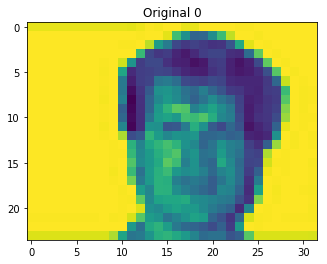

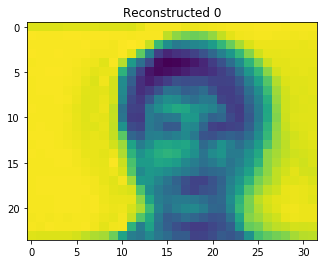

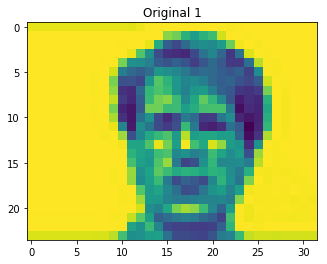

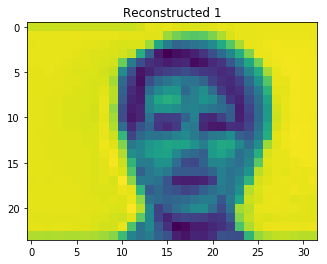

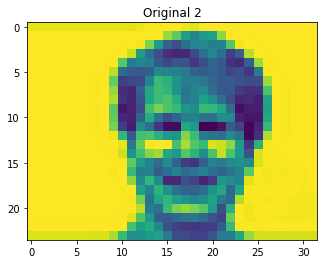

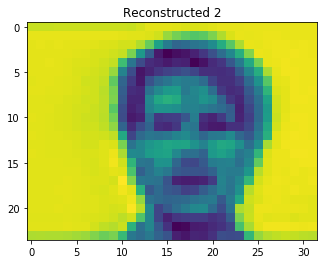

In [6]:
[f_a_2, X_hat, grad_f_a_2, grad_f_a_3] = forwardprop(W_1, W_2, X)

import matplotlib.pyplot as plt 
plt.imshow(np.reshape(X.T[0]*sigma + mu, sz))
plt.title('Original 0')
plt.show()
plt.imshow(np.reshape(X_hat.T[0]*sigma + mu, sz))
plt.title('Reconstructed 0')
plt.show()
plt.imshow(np.reshape(X.T[1]*sigma +mu, sz))
plt.title('Original 1')
plt.show()
plt.imshow(np.reshape(X_hat.T[1]*sigma + mu, sz))
plt.title('Reconstructed 1')
plt.show()
plt.imshow(np.reshape(X.T[2]*sigma + mu, sz))
plt.title('Original 2')
plt.show()
plt.imshow(np.reshape(X_hat.T[2]*sigma + mu, sz))
plt.title('Reconstructed 2')
plt.show()



<H3>Exercise 2 (3 points)</H3>

Plot the rows and columns of the weight matrices *W1* and *W2* reshaped to the image width and height to check the receptive and projective field structure.

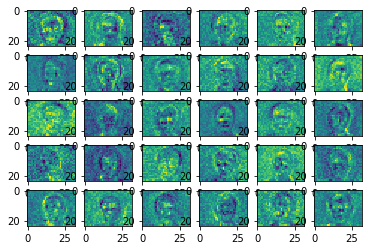

(768L, 30L)


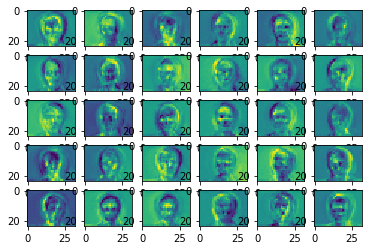

In [12]:
plt.figure()
for i in range(1,31):
    plt.subplot(5,6,i)
    plt.imshow(np.reshape(W_1[i-1], sz))
plt.show()

for i in range(1,31):
    plt.subplot(5,6,i)
    plt.imshow(np.reshape(W_2.T[i-1], sz))
plt.show()
